# TP03: Régression logistique

La **_régression logistique_** est une autre technique supervisée utilisée en machine learning. C'est la méthode de classification pour les problèmes avec deux classes (0/1).

## I-Algorithm du Gradient de descente

- **_Hypothèses_**: $h_\theta(x)= \frac{1}{1+\exp(-\theta^Tx)}$

$h_\theta(x)> 0.5$ quand la classe (étiquette) vaut $Y=1$.

$h_\theta(x) < 0.5$ quand la classe (étiquette) vaut $Y=0$.

**_Paramètres du modèle_**: $\theta$ avec $m$ exemples, $n$ variables.

**_Fonction du coût_**: $J(\theta)=-\frac{1}{m}\sum_{i=0}^{m} y(i)\log(h_\theta(x(i)))+(1-y(i)) \log(1-h_\theta(x(i)))$

**_Objectif_**: Trouver les meilleurs paramètres $\theta$ revient à minimiser la fonction du coût.
$\min_{\theta} J(\theta)$

**_Algorithme du Gradient de descente_**: $\theta_j=\theta_j-\alpha \frac{1}{m}\sum_{i=0}^{m} (h_\theta(x(i))-y(i))x_j(i)$


### 1. Recuperation des données

#### **_Q1_**

-utilisez la fonction **_make_blobs(n_samples,centers, cluster_std,random_state)_** du module **_sklearn.datasets_** pour generer deux classes puis visualiser les deux classes comme suivants:

- rouge: y=0
- blue: y=1


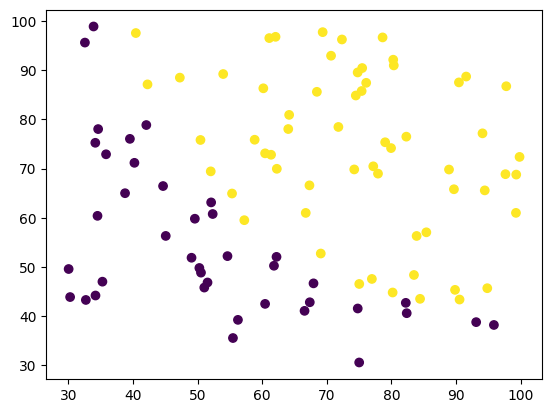

In [380]:

import numpy as np
import matplotlib.pyplot as plt

data = np.genfromtxt('./TP2 ex2data1.txt', delimiter=',')
X = data[:, 0:2]
Y = data[:, 2]
plt.scatter(X[:,0] , X[:,1] , c = Y)
plt.show()

#### **_Q2_**

          -a)Corriger les dimentions avec np.reshape

          -b)Créez la matrice X

          -c) Créez le vecteur $\theta$ (initialisé avec des coefficients nuls)


In [381]:
Y = np.reshape(Y , (Y.shape[0],1))

In [382]:
X = np.array([[X[i][0] , X[i][1],1] for i in range(len(X))])

In [383]:
theta = np.zeros((X.shape[1], 1))
theta

array([[0.],
       [0.],
       [0.]])

- Normaliser les données


In [384]:
# normlse   
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# X = scaler.fit_transform(X)

### 2. Implémentation du modèle et évaluation

#### **_Q1_**


a) Implémenter la **_fonction sigmoid_** $h_\theta(x)= \frac{1}{1+\exp(-X\theta)}$

b) Ecrire la **_Fonction du coût_**:$J(\theta)=-\frac{1}{m}\sum_{i=0}^{m} y(i)\log(h_\theta(x(i)))+(1-y(i)) \log(1-h_\theta(x(i))$

c) Ecrire un script qui définit la fonction du gradiant $$ \frac{\delta J(\theta)}{\delta \theta}=\frac{1}{m}X^T.(X.\theta-y)$$

d) Implementer la descente de gradient en utilisant de gradiant:
$$ \theta\leftarrow \theta- \alpha\frac{\delta J(\theta)}{\delta \theta}$$

e) Trouver les valeurs de $\theta$ pour un learning rate $\alpha=0.1$ et un nombre d'itérations de $150$


In [385]:
def sigmoid(X , theta):
    return 1 / (1 + np.exp(-(X.dot(theta))))

In [386]:
def cost_function(theta , X , Y):
    return -(1 / len(Y)) * np.sum(Y * np.log(sigmoid(X, theta)) + (1 - Y)*np.log(1 - sigmoid(X, theta)))

In [387]:
def function_grad(X , Y , theta):
    return (1 / len(Y)) * X.T.dot((X.dot(theta)) - Y)

In [388]:
def descente_grad(X , Y , theta , a):
    return theta - (a * function_grad(X , Y , theta))

In [394]:
nombre_detteration = 1000
alfa = 0.01
cost_func = []
for i in range(nombre_detteration):
    theta = descente_grad(X , Y , theta, alfa)
    cost_func.append(cost_function(theta, X ,Y))

print("Final Theta:", theta.reshape(-1))

Final Theta: [nan nan nan]


#### **_Q2_**

a) Evaluer le modèle en calculant le coefficient de corrélation

b) Tracer la courbe d'apprantissage


In [390]:
Y_predect = sigmoid(X , theta)

In [391]:
def coef_determination(y , pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

## 3. Prédiction

A quelle classe apartient les deux points suivants: x1=45, 85


In [392]:
x1 = np.array([[45, 85]])
result = sigmoid(x1, theta)
result

# plot the point in the graph


ValueError: shapes (1,2) and (3,1) not aligned: 2 (dim 1) != 3 (dim 0)

In [ ]:
def which_class(test):
    if test > 0.5:
        return 1
    return 0

In [ ]:
last_result = []
for i in Y_predect:
    last_result.append(which_class(i))

In [ ]:
coef_determination(Y , Y_predect)

0.21897930719096492

In [ ]:
# caclucale the accuracy
accuracy = (Y == last_result).mean()
accuracy


0.502

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y , last_result)
# show 

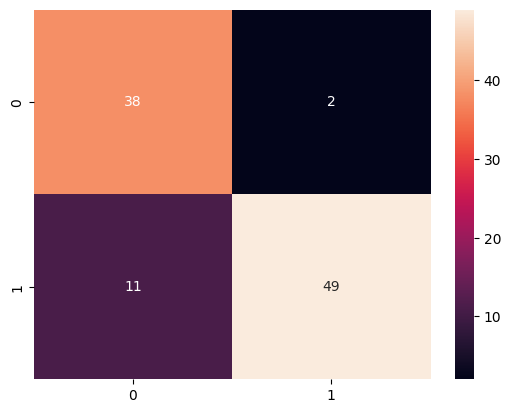

In [ ]:
#  show confusion matrix in heatmap
import seaborn as sns
sns.heatmap(cm , annot=True)
plt.show()

0.5655902879416049


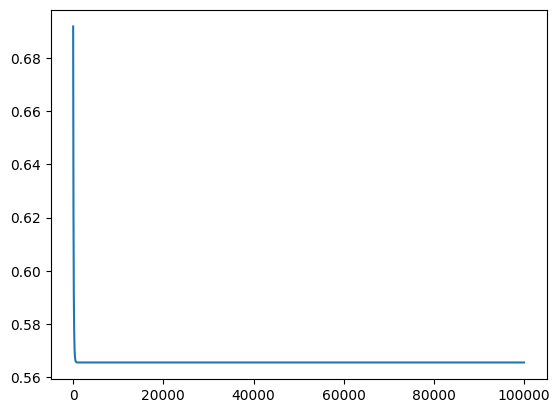

In [ ]:
# show cost 
plt.plot(range(1000),cost_func)
print(cost_func[-1])

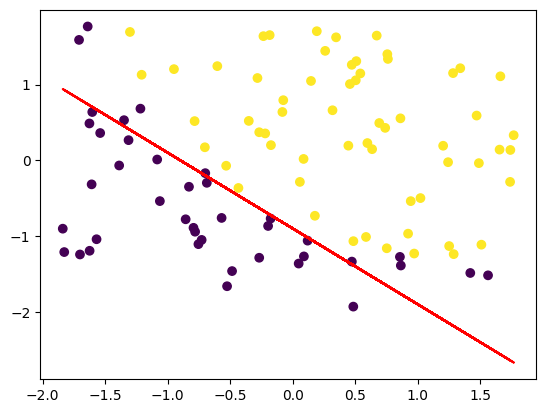

In [ ]:
plt.scatter(X[:,0] , X[:,1] , c = Y)
# plot the line
plt.plot(X[:,0], (-1/theta[0]) * (theta[0] * X[:,0] + theta[1]), color = 'red')
plt.show()